In [2]:
import os 
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import nltk.corpus 

data = pd.read_excel('../Text_Mining/all_texts.xlsx', header = None)
#data[0][0]

In [3]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
data_tokenized = []
for i in range(len(data)):
    data_token_temp = word_tokenize(data[0][i])
    data_tokenized.append(data_token_temp)
#print(data_tokenized[3][1])    
for i in range(len(data_tokenized)):
    for j in range(len(data_tokenized[i])):
        data_tokenized[i][j] = data_tokenized[i][j].lower()
        #data_tokenized[i][j] = stemmer.stem(data_tokenized[i][j])
        data_tokenized[i][j] = re.sub('[^a-z]', '', data_tokenized[i][j])
#print(data_tokenized[0])        
    

In [4]:
from nltk.probability import FreqDist
fdist = FreqDist()

for i in data_tokenized[0]:
    fdist[i]+=1
fdist


FreqDist({'': 1110, 'the': 347, 'to': 162, 'a': 155, 'of': 147, 'and': 112, 'in': 95, 'that': 89, 'is': 84, 'be': 64, ...})

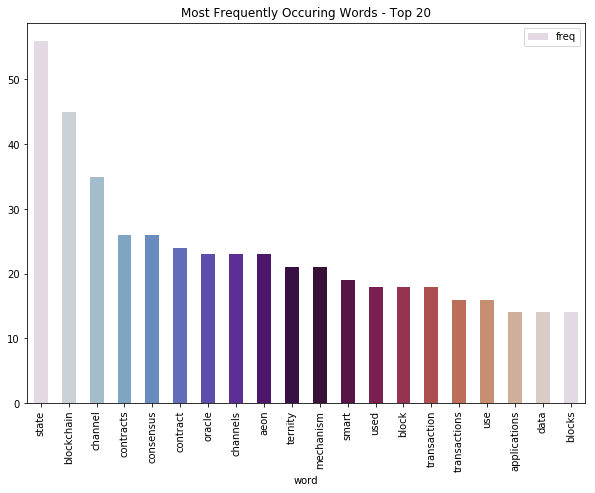

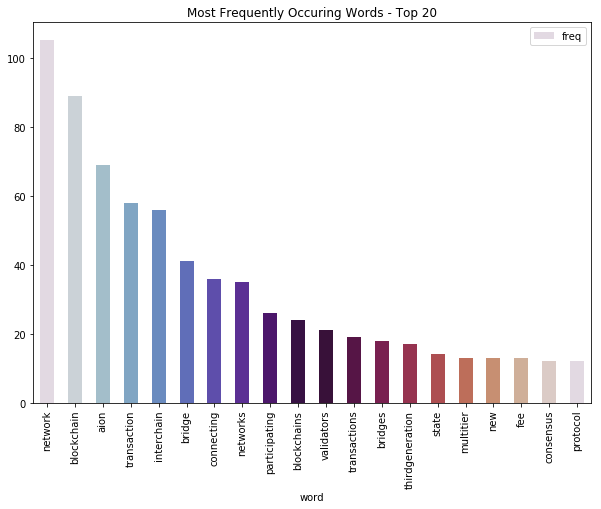

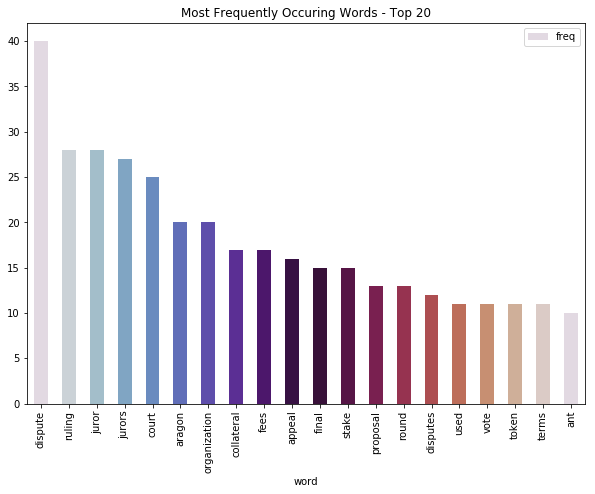

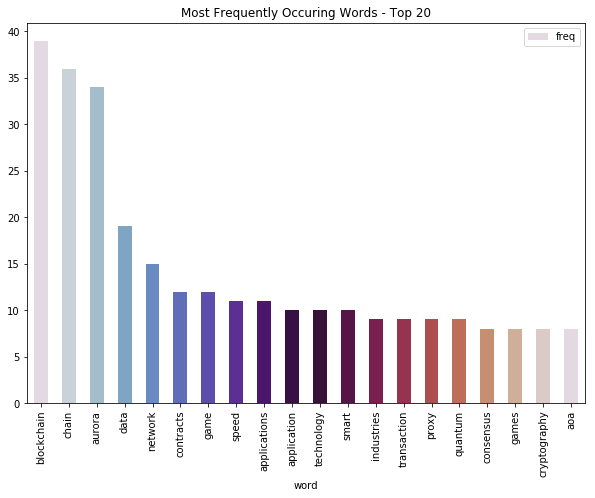

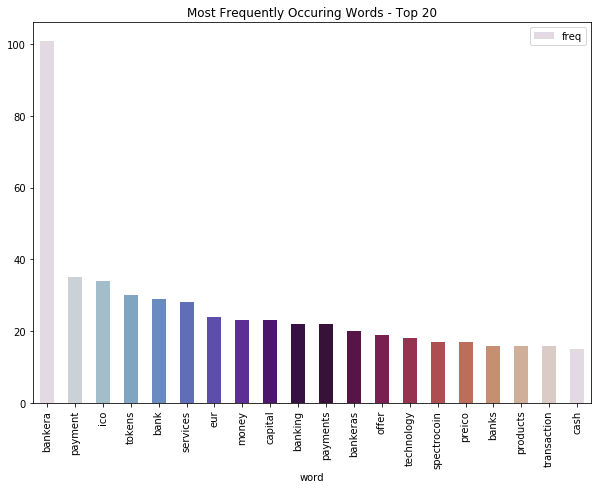

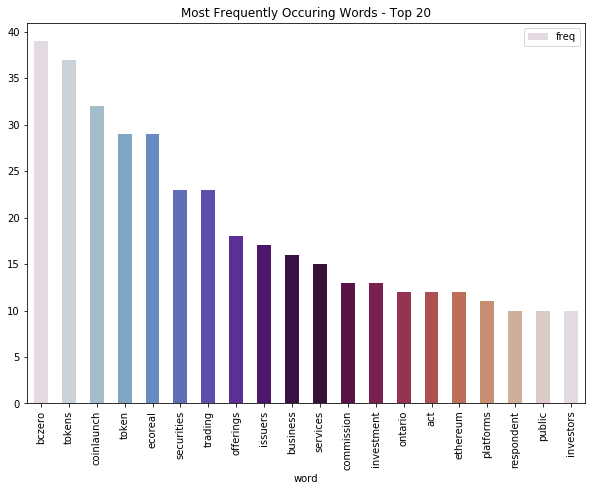

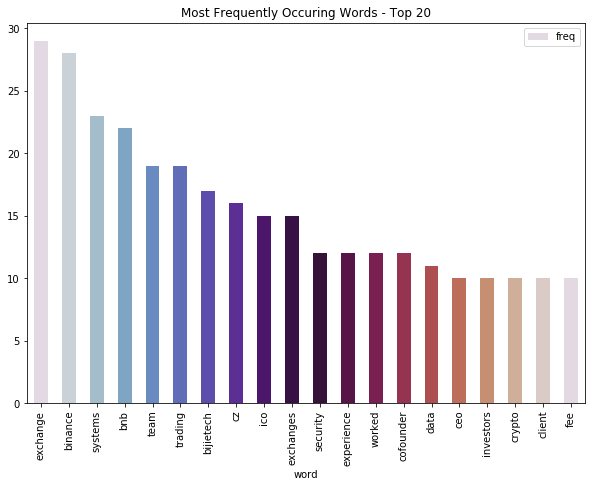

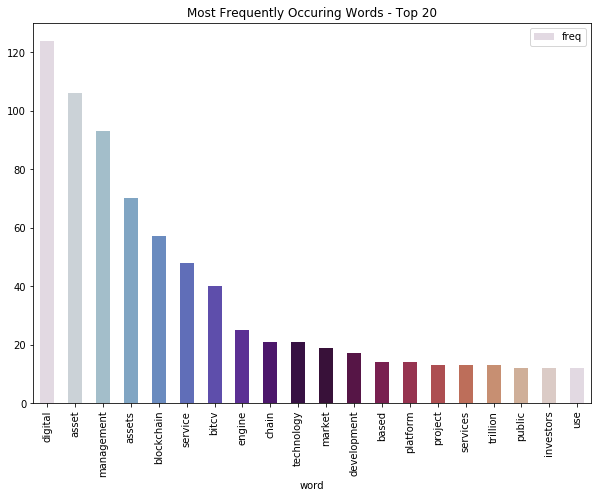

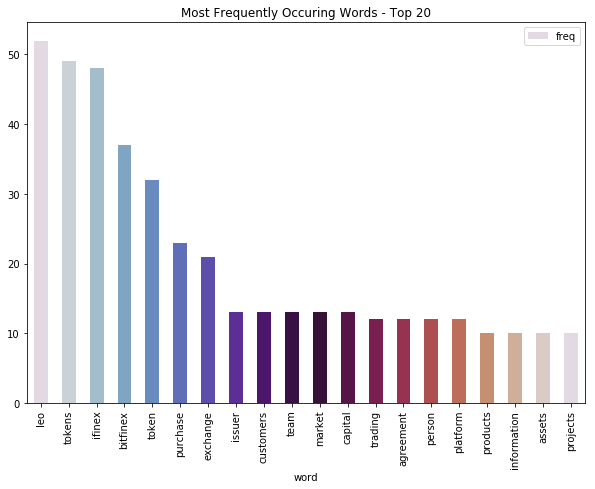

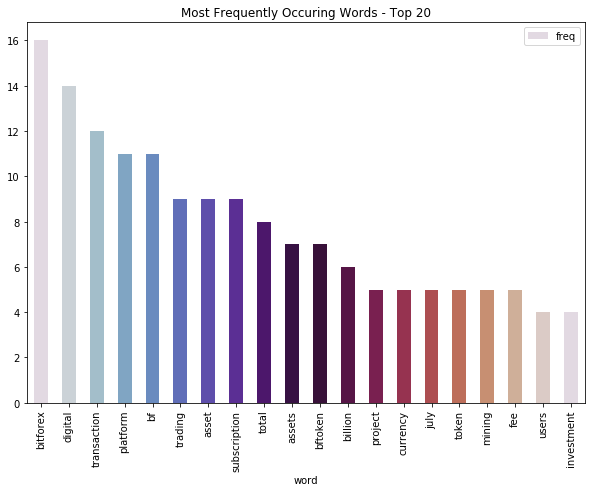

In [5]:

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
for i in range(0, 10):
    words = cv.fit_transform(data_tokenized[i])
    sum_words = words.sum(axis=0)


    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

    fy = frequency.head(20)
    #print (fy)
    color = plt.cm.twilight(np.linspace(0, 1, 20))
    frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(10, 7), color = color)
    plt.title("Most Frequently Occuring Words - Top 20")


In [7]:
#from sklearn.cluster import KMeans
#from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000, min_df=0, stop_words='english', use_idf=True)
#corpus = []
X = []
for i in range(len(data_tokenized)):
    X = vectorizer.fit_transform(data_tokenized[i])

#corpus.append(X)

#getting the shape of X
print("Shape of X :", X)

Shape of X :   (3, 645)	1.0
  (4, 736)	1.0
  (6, 233)	1.0
  (7, 327)	1.0
  (10, 317)	1.0
  (11, 114)	1.0
  (13, 996)	1.0
  (15, 44)	1.0
  (16, 94)	1.0
  (17, 1020)	1.0
  (18, 357)	1.0
  (22, 6)	1.0
  (26, 736)	1.0
  (28, 350)	1.0
  (29, 556)	1.0
  (30, 390)	1.0
  (31, 681)	1.0
  (32, 327)	1.0
  (34, 309)	1.0
  (35, 923)	1.0
  (38, 317)	1.0
  (39, 114)	1.0
  (42, 736)	1.0
  (44, 502)	1.0
  (46, 830)	1.0
  :	:
  (5896, 443)	1.0
  (5898, 1015)	1.0
  (5900, 10)	1.0
  (5907, 315)	1.0
  (5909, 444)	1.0
  (5911, 316)	1.0
  (5913, 10)	1.0
  (5920, 386)	1.0
  (5921, 292)	1.0
  (5923, 48)	1.0
  (5924, 169)	1.0
  (5925, 444)	1.0
  (5927, 117)	1.0
  (5932, 230)	1.0
  (5935, 233)	1.0
  (5936, 127)	1.0
  (5937, 598)	1.0
  (5942, 386)	1.0
  (5943, 292)	1.0
  (5947, 750)	1.0
  (5948, 604)	1.0
  (5951, 114)	1.0
  (5954, 919)	1.0
  (5956, 444)	1.0
  (5958, 118)	1.0


In [145]:
len(data_tokenized)


93